In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name="labels.txt"
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip("\n").split("\n")

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001E8129DBAF0>

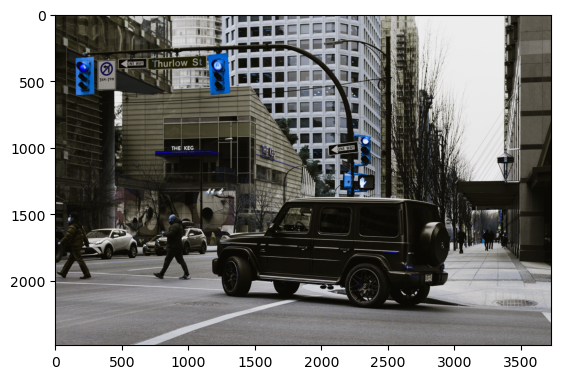

In [13]:
img=cv2.imread("pexels-confinedriley-11340772.jpg")
plt.imshow(img)

In [14]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [15]:
print(ClassIndex)

[ 8 10  3  1  3  1  3 10  1  3 10]


In [24]:
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,color=(0,255,0), thickness=10)

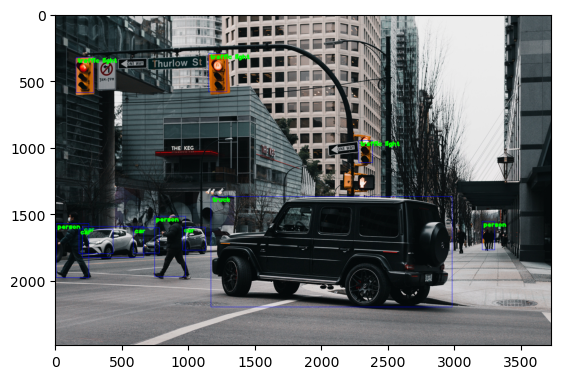

In [25]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
# Video
cap= cv2.VideoCapture("pexels-george-morina-5330874-1920x1080-30fps.mp4")
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cant Open The Video")
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame=cap.read()
    ClassIndex, confidece, bbox= model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,color=(0,255,0), thickness=3)
      
    
    cv2.imshow("object detection",frame)
    
    if cv2.waitKey(2) & 0xff ==ord("q"):
        break
    
cap.release()
cv2.destroyAllWindows()

[ 1  1  1 10  1  1]
[ 1  1  1 10  1  1]
[ 1  1  1 10  1  1]
[1 1 1 1 1 1]
[ 1  1  1  1  1 10]
[ 1  1  1  1  1 10  1]
[ 1  1  1  1  1 10  1  1]
[ 1  1  1  1  1  1 10  1  1]
[ 1  1  1  1  1  1  1 10  1]
[ 1  1  1  1  1  1 10]
[ 1  1  1  1  1  1 10  1]
[ 1  1  1  1  1 10  1  2  2  1]
[ 1  1  1  1  1  1 10  2]
[ 1  1  1  1  1  1 10  2  2]
[ 1  1  1  1  1  1 10]
[ 1  1  1  1  1  1  2  2 10  2  2]
[ 1  1  1  1  1  1 10  2]
[ 1  1  1  1  1  1  2 10  1]
[ 1  1  1  1  1  2  1  1 10  1  2]
[ 1  1  1  1  1  1  2 10  1  1]
[ 1  1  1  1  2  1  1  1 10  2]
[ 1  1  1  1  2  1 10  1  1  1  2]
[ 1  1  1  2  1  1 10  1  1  2  1]
[ 1  1  1  1  2  1  1 10  1  1  2]
[ 1  1  1  1  1  2 10  1  1  1]
[ 1  1  1  1  1  2  1 10  1]
[ 1  1  1  1  1 10  2  1]
[ 1  1  1  1  1  1 10  2  1]
[ 1  1  1  1  1 10  2  1]
[ 1  1  1  1  1 10  2  1  1  1]
[ 1  1  1  1  6  1  1 10  2  1]
[ 1  1  6  1  1  1 10  1  2  1  2  1]
[ 1  1  1  1  1  6 10  1  1  2  2  1  2]
[ 1  1  1  1  6  1 10  2  1  2  1  2]
[ 1  1  6  1  1  1 10  